# installments payments data cleaning

## Import libraries

In [1]:
import sys
sys.path.insert(0, '../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import modules.missing as ms
import warnings
warnings.filterwarnings('ignore')

## Load data

In [2]:
ipayment = pd.read_csv('.././data/installments_payments.csv')

## Preliminary analysis

In [5]:
display(ipayment.sample(10))
print(f'\nInstallment Payment data contains:\n{ipayment.shape[0]} rows and {ipayment.shape[1]} columns')
print(f'\nInstallment Payment data info:')
print(ipayment.info())
print(f'\nStatistical Summary of numerical columns:\n')

numerical = ipayment.select_dtypes(include='number')
display(numerical.describe())

print('\nNo Categorical column in the data')

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
5617118,2216360,201598,1.0,8,-213.0,-213.0,29815.155,29815.155
12892126,1128114,428600,1.0,3,-295.0,-316.0,9854.280,9854.280
4221732,1468754,258669,1.0,7,-2210.0,-2213.0,15166.125,15166.125
12357414,1645054,422726,0.0,103,-15.0,-15.0,337.680,337.680
6494076,1547889,255087,1.0,2,-2031.0,-2050.0,10411.965,10411.965
5523701,1486265,269583,3.0,12,-95.0,-93.0,12672.315,8127.675
11232300,1644543,322455,1.0,1,-150.0,-154.0,6439.950,6439.950
6856228,1340060,206279,0.0,7,-797.0,-797.0,101766.465,101766.465
6990979,2413013,208040,0.0,114,-1707.0,-1707.0,321.075,321.075
10825008,1435624,333537,13.0,9,-299.0,-306.0,50839.605,50839.605



Installment Payment data contains:
13605401 rows and 8 columns

Installment Payment data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None

Statistical Summary of numerical columns:



,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06



No Categorical column in the data


## Duplicate Checking

In [6]:
dup = ipayment.duplicated().sum()
print(f'\nNumber of duplicate rows: {dup}')


Number of duplicate rows: 0


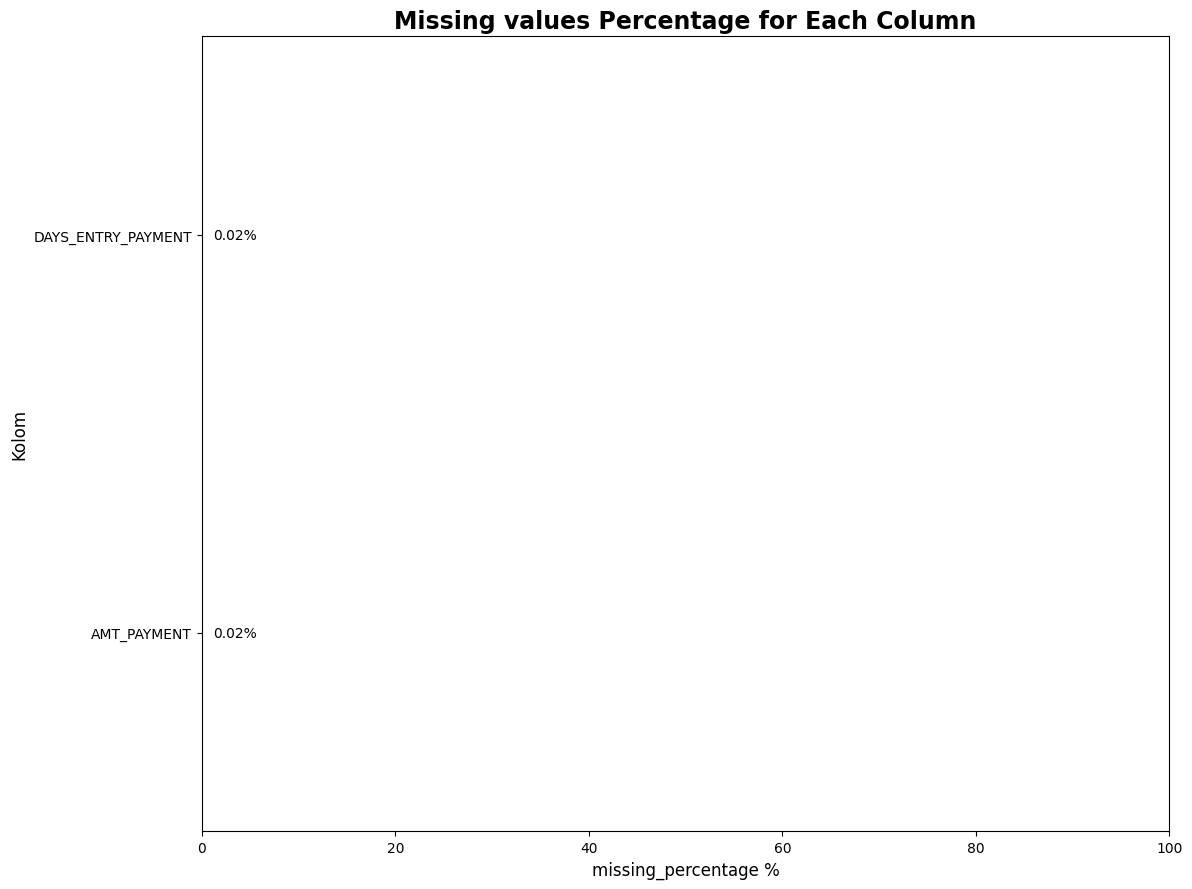

In [7]:
ms.plot_missing_percentage(ipayment)

because the missing values only 0.02% of the data, i decided to drop the missing values.

In [6]:
ipayment_clean = ipayment.dropna()
ipayment_clean.to_csv('.././data/installments_payments_clean.csv', index=False)